## Overview

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?


- Is the website redesign any good?


- Is our television ad driving more sales?

## T-Test

1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?


- Are adults who drink milk taller than adults who dont drink milk?


- Is the the price of gas higher in texas or in new mexico?


- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?





2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.





3. Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


- Are compact cars more fuel-efficient than the average car?


- Do manual cars get better gas mileage than automatic cars?

## Correlation

1. Answer with the type of stats test you would use (assume normal distribution):


- Is there a relationship between the length of your arm and the length of your foot?
                
        Pearson's R


- Do guys and gals quit their jobs at the same rate?
          
        T-test 2 tail

- Does the length of time of the lecture correlate with a students grade?
        
        Pearson's R






2. Use the telco_churn data.
- 2.A. Does tenure correlate with monthly charges?

Takeaways:
       There is a correlation between monthly charges and tenure.
       With an r of .28, we can say the correlation is "weak-moderate"

 Its good practice to include Takeaways at the end to convey your key findings in more simple terms



- 2.B. Total charges?

Takeaway:  There is a linear correlatioin between tenure and total charges. r = .89 means the correlation is strong


- 2.C. What happens if you control for phone and internet service?

takeaways: moderate-strong correlation between tenure and monthly charges for customers who have only phone service





In [1]:
#import libraries and env
import pandas as pd
import numpy as np
import env
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline


pd.options.display.max_columns = None #expands number of visible columns



In [2]:
#get our data into the python environment, env contains credentials

def get_db_url(username, password, host, db):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

url = get_db_url(env.username, env.password, env.host, db='telco_churn')

In [3]:
# create query and dataframe for the data we are pulling from the sql server
query = 'SELECT * FROM customers'

df = pd.read_sql(query, url)


In [4]:
# glance at what I pulled
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,Yes,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,No,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,No,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,Yes,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,No,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


6 step process:
1. state our hypothesis, set our alpha value. 
2. select the data
3. plot the data
4. test for assumptions (normal distribution for correlation)
5. run test
6. draw conclusions

 Step 1. state our hypothesis, set our alpha value. 

H_0: no linear correlation between tenure and monthly charges

H_a: there is a linear correlation between tenure and monthly charges

- specify linear correlation since that is what I'm testing.  do not say just "no correlation"

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

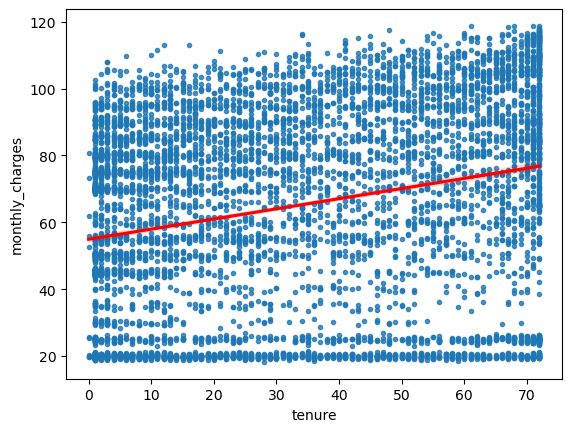

In [5]:
# 2. select the data

charges_df = df[['monthly_charges', 'tenure']] #choosing the columns and creating a new df

#3. plot the data

sns.regplot(x='tenure', y='monthly_charges', 
            data = charges_df, marker = '.',
            line_kws = {'color': 'red'})
# this is setting the x and y axes, setting the data we are plotting to the new df,
# setting marker type, setting trendline color

 



<AxesSubplot:>

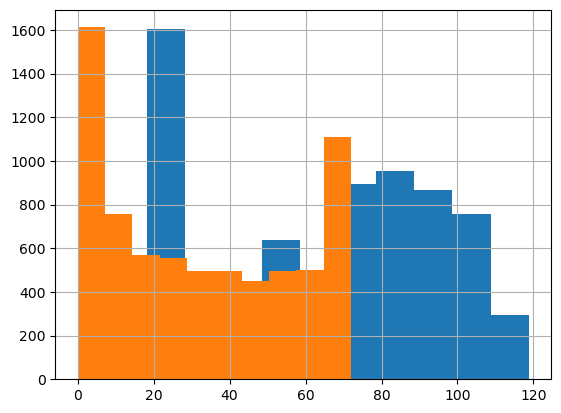

In [6]:
# 4. test for assumptions (normal distribution for correlation)

charges_df.monthly_charges.hist()
charges_df.tenure.hist()

In [7]:
# these distros are not normal, use Spearmans test
# 5. run test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

alpha = 0.05 #set our alpha (confidence level)
r, p = stats.spearmanr(charges_df.tenure, charges_df.monthly_charges)

def eval_result(alpha, p):
    if p < alpha:
        return print(f'Reject the null hypotheses.  There is a linear correlation (p-value: {p})')
    else:
        return print(f'We fail to reject the null hypothesis that there is a linear correlation (p-value: {p})')
# the above is creating a function for our test that returns the answer we are looking for.  if p is low reject the Ho etc.




In [8]:
#call the function
eval_result(alpha, p)

r 

Reject the null hypotheses.  There is a linear correlation (p-value: 1.0271266876409408e-123)


0.27641678933130215

In [9]:
# 6. draw conclusions

# Takeaways:
#       There is a correlation between monthly charges and tenure.
#       With an r of .28, we can say the correlation is "weak-moderate"

# Its good practice to include Takeaways at the end to convey your key findings 
#   in more simple terms

Begin 2.B. 

2.B. Does tenure correlate with total charges?

1. state our hypothesis, set our alpha value. 
2. select the data, run a .info()
3. plot the data
4. test for assumptions (normal distribution for correlation)
5. run test
6. draw conclusions

Hypothesis: 
- H_0: There is no linear correlation between tenure and total charges.

- H_a: There is a linear correlation between tenure and total charges. 

In [10]:
#Step 1
alpha = 0.05



#Step 2 select the data
ttl_charges_df = df[['tenure', 'total_charges']]

ttl_charges_df.info() #look at summary of new df with .info()

ttl_charges_df.total_charges.sort_values() #look for data errors
#can see here that the dtype of total_charges is object.  Need to 
#change it to float

#convert empty spaces to 0
ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')

#check dtypes again
ttl_charges_df.info()
#confirmed, total_charges is now dtype float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tenure         7043 non-null   int64 
 1   total_charges  7043 non-null   object
dtypes: int64(1), object(1)
memory usage: 110.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         7043 non-null   int64  
 1   total_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


/var/folders/4f/nyhvlyfd511911zdvn0fq0_00000gn/T/ipykernel_19634/1797572317.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')


<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

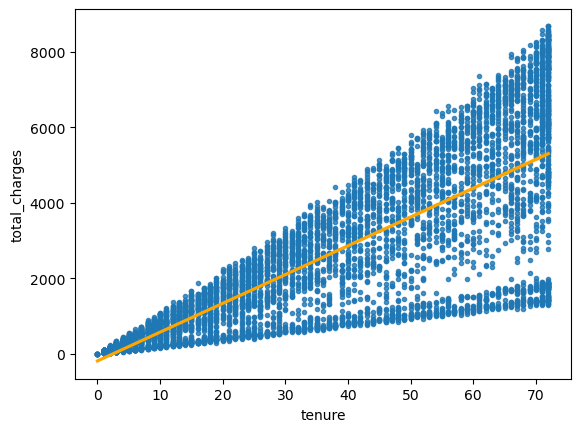

In [11]:
# Step3. plot the data

sns.regplot(x='tenure', y='total_charges',
            data=ttl_charges_df,
            marker='.', line_kws={'color': 'orange'})

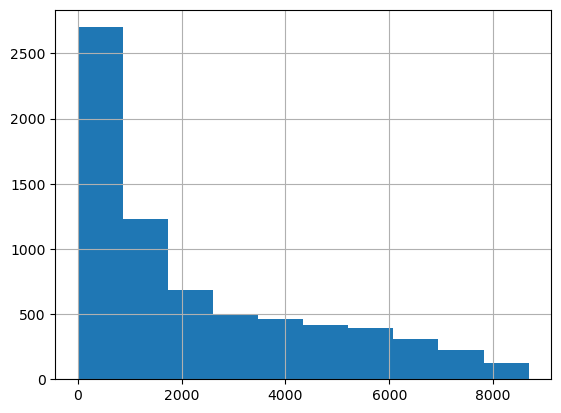

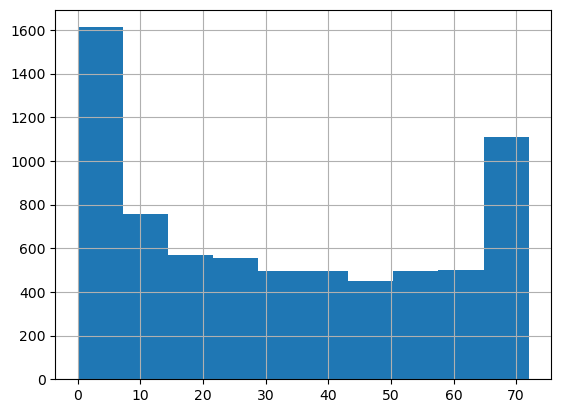

In [12]:
# Step4. test for assumptions (normal distribution for correlation)

ttl_charges_df.total_charges.hist()
plt.show()
ttl_charges_df.tenure.hist()
plt.show()

In [13]:
# not normally distributed, use spearmans r test


#Step 5. run test

r, p = stats.spearmanr(ttl_charges_df.tenure, ttl_charges_df.total_charges)

eval_result(alpha, p)

r

Reject the null hypotheses.  There is a linear correlation (p-value: 0.0)


0.8896957900597577

Step 6. Draw conclusions

Takeaway:  There is a linear correlatioin between tenure and total charges. r = .89 means the correlation is strong

#- 2.C. What happens if you control for phone and internet service?
1. state our hypothesis, set our alpha value. 
2. select the data, run a .info()
3. plot the data
4. test for assumptions (normal distribution for correlation)
5. run test
6. draw conclusions


In [14]:
# Step 1 state our hypothesis, set our alpha value. 
# H_0: there is no linear correlation between tenure and monthly charges. 
# H_a: there is a linear correlation between tenure and monthly charges. 

alpha = 0.05


In [15]:
#Step 2. select the data, run a .info()

phone_df = df[(df.phone_service == 'Yes') & (df.internet_service_type_id == 1)][['tenure', 'monthly_charges']]
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           1739 non-null   int64  
 1   monthly_charges  1739 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

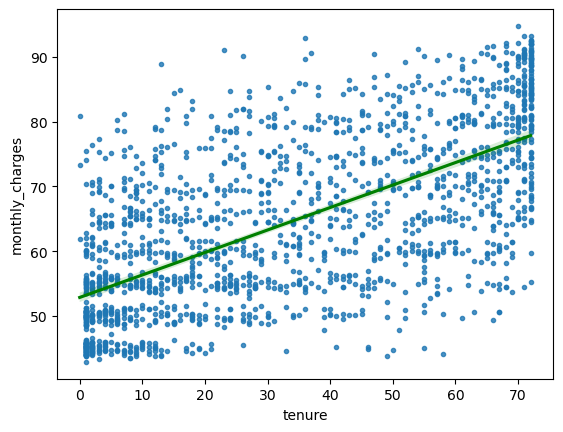

In [16]:
#Step 3. plot the data

sns.regplot(x='tenure', y='monthly_charges', data = phone_df, 
            marker = '.', line_kws=({'color': 'green'}))

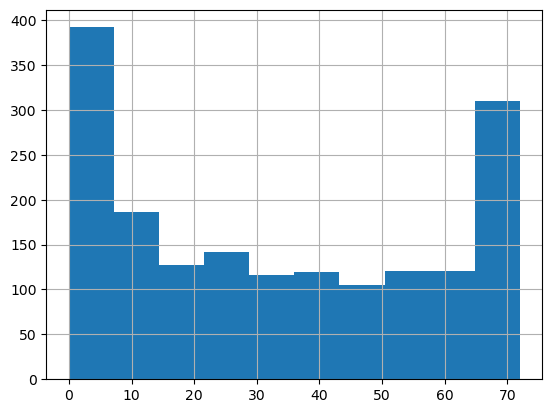

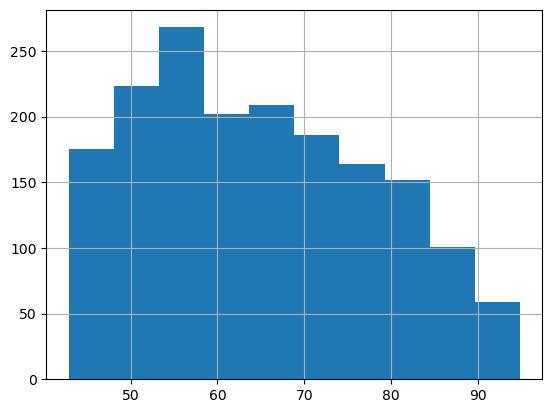

In [17]:
#Step 4 check for normal distribution

phone_df.tenure.hist()
plt.show()

phone_df.monthly_charges.hist()
plt.show()

In [18]:
#not normally distributed.  use spearman test

#Step 5 run test

r, p = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)
eval_result(alpha, p)

print(f'r value = {r}')

Reject the null hypotheses.  There is a linear correlation (p-value: 5.423601644635052e-222)
r value = 0.6644708508462759


Step 6 draw conclusions

takeaways: moderate-strong correlation between tenure and monthly charges for customers who have only phone service


- - - 


3. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?


- Is there a relationship between how long an employee has been with the company and the number of titles they have had?






1. state our hypothesis, set our alpha value. 
2. select the data, run a .info()
3. plot the data
4. test for assumptions (normal distribution for correlation)
5. run test
6. draw conclusions

In [19]:
#get the data into the python environment

url = get_db_url(env.username, env.password, env.host, db='employees')

query = '''
SELECT * 
FROM employees
JOIN salaries USING (emp_no)
WHERE to_date = '9999-01-01';
'''

df = pd.read_sql(query, url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


#Step 1. state our hypothesis, set our alpha value. 

H_0: no linear correlation between e


4. Use the sleepstudy data.
- Is there a relationship between days and reaction time?

## Chi Square

1. Answer with the type of stats test you would use (assume normal distribution):

- Do students get better test grades if they have a rubber duck on their desk? 1 tailed t-test

- Does smoking affect whether or not someone has lung cancer?
chi^2

- Is gender independent of a person’s blood type?
chi^2

- A farming company wants to know if a new fertilizer has improved crop yield or not
Probably t-test, Adam please change this question for future classes

- Does the length of time of the lecture correlate with a students grade?
correlation test (pearsonr)

- Do people with dogs live in apartments more than people with cats?
chi^2




2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

- - -
    Codeup Student	    Not Codeup Student
    49                  20                   Uses a Macbook
    1                   30                   Doesn't Use A Macbook
- - -



In [20]:
df = pd.DataFrame({'Codeup student': [49, 1], 'Not Codeup student': [20, 30]}) #manually creating dataframe from the data above
df

,Codeup student,Not Codeup student
0,49,20
1,1,30


In [21]:
df.index = ['Mac user', 'Not mac user'] #setting index to something more readable
df

,Codeup student,Not Codeup student
Mac user,49,20
Not mac user,1,30


In [22]:
#run test
chi2, p, degf, expected = stats.chi2_contingency(df)
chi2, p

(36.65264142122487, 1.4116760526193828e-09)

Null: using macbook and being a Codeup student are independent of eachother

Alternative: using macbook and being a Codeup student are NOT independent of eachother


In [23]:
alpha = 0.05

if p < alpha:
    print('Reject the null')
else:
    print('Fail to reject null')

Reject the null


- - - 


3. Choose another 2 categorical variables from the mpg dataset and perform a chi^2 contingency table test with them. Be sure to state your null and alternative hypotheses.




In [24]:
#import mpg database
mpg = data('mpg')
mpg.head()
from pydataset import data


mpg = data('mpg')
mpg.head()

NameError: name 'data' is not defined

In [ ]:
mpg['trans'].str.startswith('a') #changing trans elements to boolean is automatic 


In [ ]:
np.where(mpg['trans'].str.startswith('a'), 'Auto', 'Manual')
#changing True/False of trans to the words Auto if True, Manual if False

In [ ]:
mpg['trans_simple'] = np.where(mpg['trans'].str.startswith('a'), 'Auto', 'Manual')
#new col named trans_simple using the previous loc
mpg.head()

In [ ]:
mpg['class'].value_counts()

In [ ]:
pd.crosstab(mpg['class'], mpg['trans_simple']) #make crosstab

In [ ]:
#run test
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(mpg['class'], mpg['trans_simple']))
chi2, p

In [ ]:
#compare to our alpha
alpha = 0.05
if p < alpha:
    print('Reject the null')
else:
    print('Fail to reject the null')

- - -


4. Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

        Fail to reject the null

- Is an employee's gender independent of whether or not they are or have been a manager?

        Fail to reject the null

In [33]:
#Use sequal ace or other environment to get the query right then copy it into python environment.
#Much faster 
query = '''
    SELECT gender, dept_name
    FROM employees
    JOIN dept_emp USING(emp_no)
    JOIN departments USING(dept_no)
    WHERE to_date > CURDATE()
    AND dept_name IN ('Sales', 'Marketing');
'''

In [34]:
url = env.get_connection('employees') #creating url using get_connection function from the my env file

df = pd.read_sql(query, url)



In [35]:
df.head() #checking to make sure it worked

,gender,dept_name
0,F,Marketing
1,M,Marketing
2,F,Marketing
3,F,Marketing
4,F,Marketing


In [37]:
df.value_counts() #checking dtypes

gender  dept_name
M       Sales        22702
F       Sales        14999
M       Marketing     8978
F       Marketing     5864
dtype: int64

In [40]:
pd.crosstab(df['gender'], df['dept_name']) #make crosstab

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [43]:
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(df['gender'], df['dept_name']))
chi2, p #calling the variables to see the result of the chi2 test

(0.3240332004060638, 0.5691938610810126)

In [42]:
expected
# wow the expected is extemely close to the observed

array([[ 5893.2426013, 14969.7573987],
       [ 8948.7573987, 22731.2426013]])

In [44]:
#evaluate against alpha
alpha = 0.05

if p< alpha:
    print('Reject the null')
else:
    print('Fail to reject the null')

Fail to reject the null


In [45]:
# 4.B.
#again, use sequel ace to test queries to get it right before using it here

query = '''
        SELECT gender, dept_no
        FROM employees
        LEFT JOIN dept_manager USING(emp_no);
        '''

In [46]:
#get data
emp=pd.read_sql(query, url)
emp.head()

,gender,dept_no
0,M,None
1,F,None
2,M,None
3,M,None
4,M,None


In [47]:
#make sure managers are in the data that we just queried
emp['dept_no'].isna().value_counts()


True     300000
False        24
Name: dept_no, dtype: int64

In [48]:
#create binary output
emp['is_manager'] = np.where(emp['dept_no'].isna(),'No','Yes')
emp.head()

,gender,dept_no,is_manager
0,M,None,No
1,F,None,No
2,M,None,No
3,M,None,No
4,M,None,No


In [49]:
#generate crosstab
gen_mgr_crosstab = pd.crosstab(emp['gender'], emp['is_manager'])

is_manager,No,Yes
gender,,
F,120038,13
M,179962,11


In [54]:
#finally, run test
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(emp['gender'], emp['is_manager']))
chi2, p

(1.4566857643547197, 0.22745818732810363)

In [55]:
#evaluate against alpha
alpha = 0.05

if p < alpha:
    print('Reject the null')
else:
    print('Fail to reject the null')

Fail to reject the null
